In [1]:
# Libraries & dirs
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

dirData = '../data/'
dirDataExt = dirData + 'external/'
dirDataProc = dirData + 'processed/'

hispIaF = dirDataProc + 'ia-hisp-counties.csv'

In [32]:
# load the csv
hispIA = pd.read_csv(hispIaF, index_col=False, dtype={'COUNTY':str})

# Create a variable to store the population deltas
hispIA['hisp_delta'] = hispIA.hisp_perc2015 - hispIA.hisp_perc1990

hispIA.head(2)

,CTYNAME,COUNTY,hisp_perc2010,hisp_perc2005,hisp_perc2000,hisp_perc1995,hisp_perc1990,hisp_perc2015,hisp_delta
0,Adair County,001,0.012,0.010,0.007,0.006,0.004,0.016,0.012
1,Adams County,003,0.011,0.007,0.006,0.005,0.004,0.011,0.007


## Histograms


Let's look at some distributions, y'all.

In [3]:
# Ideally we'd like small multiples because otherwise it's a pain
years = ['2015', '2010', '2005', '2000', '1995', '1990']

myData = {}
for i in years:
    myData[i] = hispIA['hisp_perc' + i]

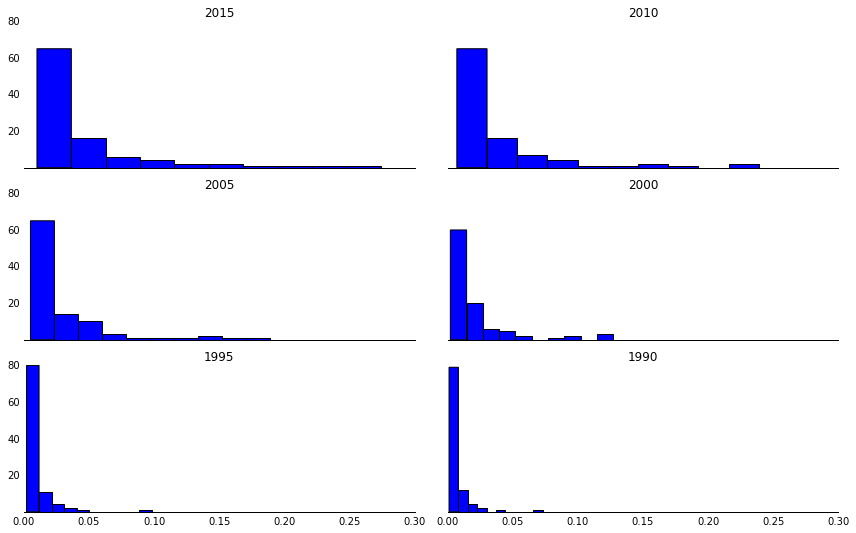

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(12,7.5))
axes_list = [item for sublist in axes for item in sublist] 

for year in years:
    
    # Store data in vars
    selection = myData[year]
    ax = axes_list.pop(0)
    
    #Axis formatting
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    
    #plot
    selection.hist(ax=ax, grid=False)
    
    # Title
    ax.set_title(year)
    
    ## Remove chart junk
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adjust y ticks
    ax.set_yticks([20, 40, 60, 80])
    
plt.tight_layout()

Analysis of the visualizations here... Lorum ipsum lorem ipsum lorem ipsum.

## Boxplots

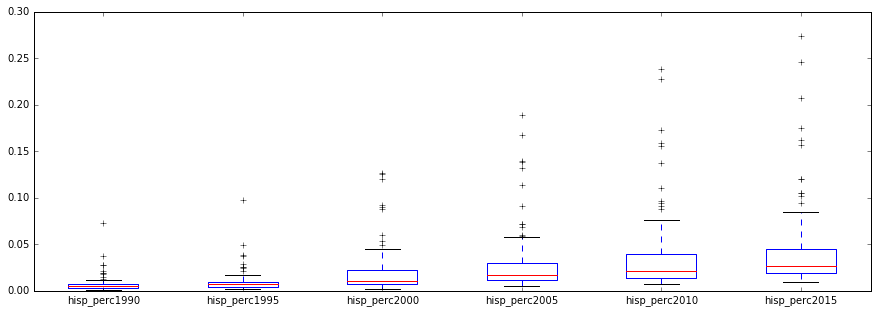

In [23]:
# Grab data for box plot
bpData = hispIA[['hisp_perc1990', 'hisp_perc1995', 'hisp_perc2000', 'hisp_perc2005', 'hisp_perc2010', 'hisp_perc2015']]

# Assign labels???
bpLabels=['90', '95', '00', '05', '10', '15']

bpData.plot.box(figsize=(15, 5))
plt.show()

## Slope Chart

In [57]:
# TBD

## Bar Charts

1. Deltas! Which county gained the most hispanics? Which county stayed stagnant?
2. 2015: Which counties have the most hispanics?

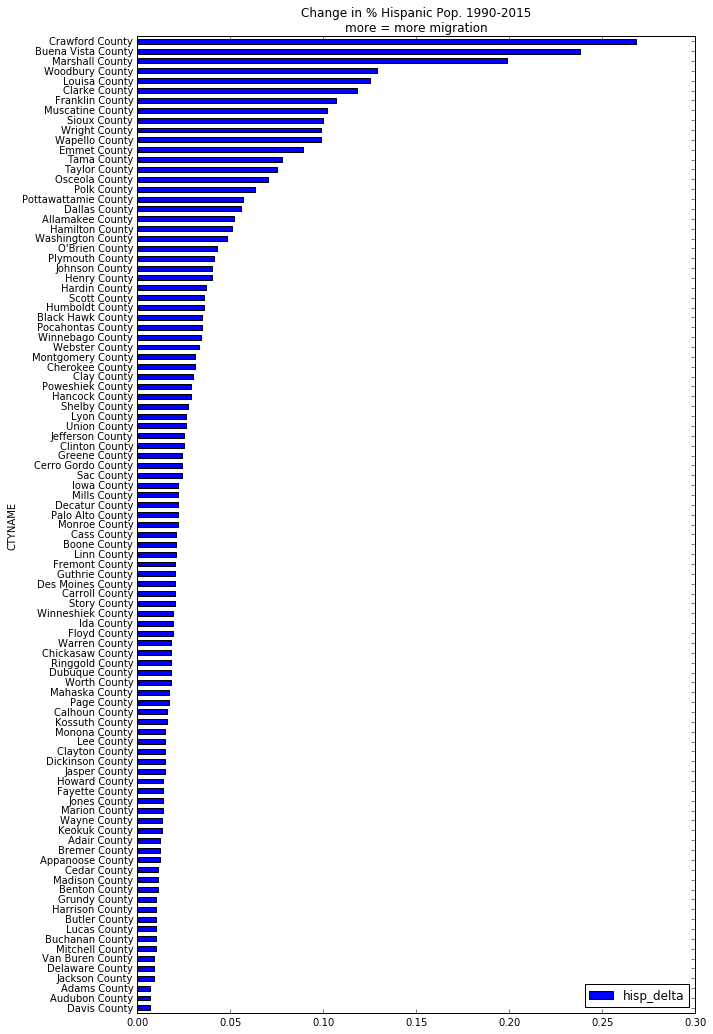

In [42]:
# Change in population
hispIA[['CTYNAME', 'hisp_delta']].set_index('CTYNAME').sort_values('hisp_delta').plot.barh(figsize=(10, 17.5),
                                                    title="Change in % Hispanic Pop. 1990-2015\nmore = more migration")

plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


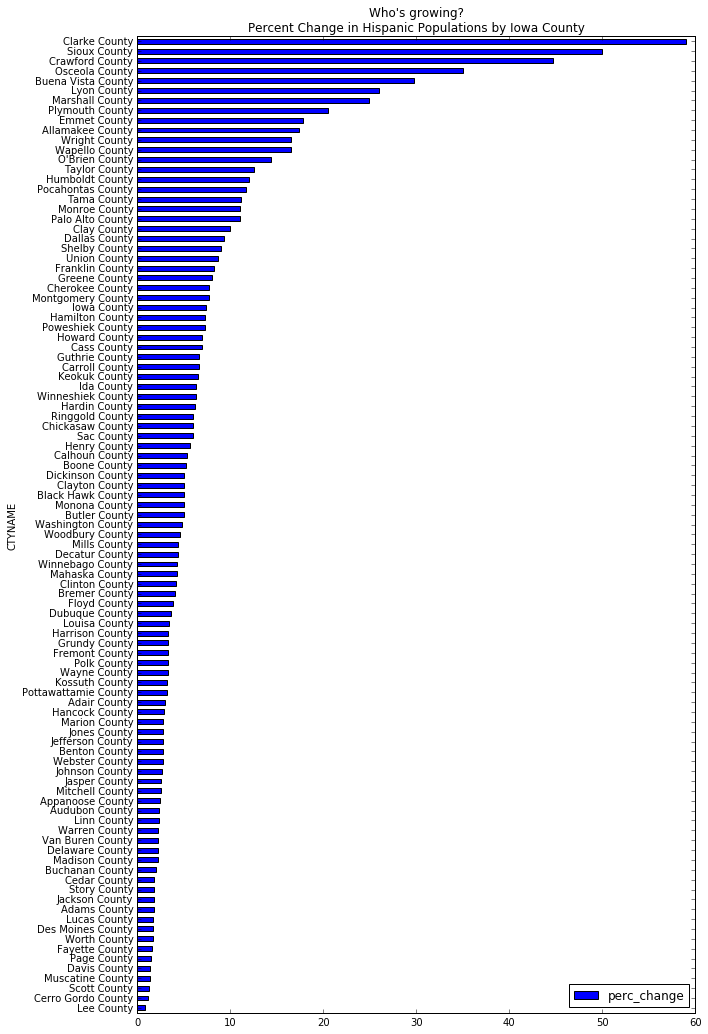

In [56]:
# percent change

#Create a dataframe and then calculate % change ((new - original)/original)
hispPercChange = hispIA[['CTYNAME', 'hisp_perc1990', 'hisp_perc2015', 'hisp_delta']]
hispPercChange['perc_change'] = (hispPercChange['hisp_delta'] / hispPercChange['hisp_perc1990'])

# Plot it
hispPercChange[['CTYNAME', 'perc_change']].set_index('CTYNAME').sort_values('perc_change').plot.barh(
    figsize=(10,17.5), title="Who's growing?\nPercent Change in Hispanic Populations by Iowa County")

plt.show()